# Starter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = '/Volumes/KINGSTON/Datasets/imet-2021-fgvc8'
labels_data = pd.read_csv(dataset_path + '/label_map.csv')
train_data = pd.read_csv(dataset_path + '/train-from-kaggle.csv')

In [3]:
train_data.head()

id                      attribute_ids
0  000040d66f14ced4cdd18cd95d91800f                       448 2429 782
1  0000ef13e37ef70412166725ec034a8a  2997 3231 2730 3294 3099 2017 784
2  0001eeb4a06e8daa7c6951bcd124c3c7                       2436 1715 23
3  000226398d224de78b191e6db45fd94e                  2997 3433 448 782
4  00029c3b0171158d63b1bbf803a7d750            3465 3322 3170 1553 781

In [4]:
labels_data.head()

attribute_id        attribute_name
0             0  country::afghanistan
1             1     country::alamania
2             2      country::algeria
3             3       country::arabia
4             4      country::armenia

In [5]:
labels_data['category'] = labels_data['attribute_name'].str.split('::').str[0]
labels_data['sub_category'] = labels_data['attribute_name'].str.split('::').str[1]

In [ ]:
unique_tags_sub_categories = labels_data.loc[labels_data['category'] == 'tags', 'sub_category'].unique()
print(unique_tags_sub_categories)

['abbeys' 'abraham' 'abstraction' 'acanthus' 'achilles' 'acorns'
 'acrobats' 'actors' 'actresses' 'adam' 'admirals' 'adonis'
 'adoration of the magi' 'adoration of the shepherds' 'ajax'
 'alexander the great' 'allegory' 'altars' 'amazons' 'american civil war'
 'american revolution' 'amphitheatres' 'amulets' 'amun' 'angels' 'anger'
 'animals' 'ankh' 'anklet' 'annunciation' 'aphrodite' 'apocalypse'
 'apollo' 'apostles' 'apples' 'arabic' 'archangel gabriel' 'arches'
 'architects' 'architecture' 'ariadne' 'armor' 'arms' 'army' 'arrowheads'
 'arrows' 'artemis' 'artists' 'assumption of the virgin' 'astronomy'
 'athena' 'athletes' 'autumn' 'avalokiteshvara' 'axes' 'bacchus' 'badges'
 'bagpipes' 'balconies' 'ballet' 'bamboo' 'banners' 'baptism of christ'
 'baptismal fonts' 'barns' 'barrels' 'baseball' 'basins' 'baskets'
 'bathing' 'bathsheba' 'bats' 'battles' 'beaches' 'beads' 'beakers'
 'bearing the cross' 'bears' 'bedrooms' 'beds' 'bees' 'benches'
 'benjamin franklin' 'bes' 'bible' 'bicycles

In [7]:
unique_country_sub_categories = labels_data.loc[labels_data['category'] == 'country', 'sub_category'].unique()
unique_culture_sub_categories = labels_data.loc[labels_data['category'] == 'culture', 'sub_category'].unique()
unique_dimension_sub_categories = labels_data.loc[labels_data['category'] == 'dimension', 'sub_category'].unique()
unique_medium_sub_categories = labels_data.loc[labels_data['category'] == 'medium', 'sub_category'].unique()

print(f"Category 'Country' has {len(unique_country_sub_categories)} unique subcategories")
print(f"Category 'Culture' has {len(unique_culture_sub_categories)} unique subcategories")
print(f"Category 'Dimension' has {len(unique_dimension_sub_categories)} unique subcategories")
print(f"Category 'Medium' has {len(unique_medium_sub_categories)} unique subcategories")

Category 'Country' has 100 unique subcategories
Category 'Culture' has 681 unique subcategories
Category 'Dimension' has 5 unique subcategories
Category 'Medium' has 1920 unique subcategories


In [8]:
unique_country_sub_categories = labels_data.loc[labels_data['category'] == 'country', 'sub_category'].unique()
print(unique_country_sub_categories)

['afghanistan' 'alamania' 'algeria' 'arabia' 'armenia' 'austria'
 'azerbaijan' 'belgium' 'borneo' 'bulgaria' 'byzantine egypt' 'canada'
 'central italy' 'chile' 'china' 'colombia' 'colombia or ecuador'
 'costa rica' 'costa rica or panama' 'czech republic'
 'democratic republic of the congo' 'dominican republic' 'ecuador' 'egypt'
 'egypt and sudan' 'egypt or iraq' 'egypt or syria' 'england' 'ethiopia'
 'france' 'france or germany' 'french' 'gabon' 'gaul' 'germany' 'ghana'
 'greece' 'guatemala' 'guatemala or mexico' 'guyana' 'honduras' 'hungary'
 'india' 'india or iran' 'indonesia' 'iran' 'iran (persia)'
 'iran or central asia' 'iran or iraq' 'iran or present-day uzbekistan'
 'iran or turkey' 'iraq' 'iraq or syria' 'ireland' 'italy' 'japan' 'kenya'
 'korea' 'madagascar' 'mali' 'mexico' 'morocco' 'mozambique' 'netherlands'
 'new zealand' 'nigeria' 'north netherlands' 'northern france'
 'northwestern iran or baghdad' 'nubia (sudan)' 'palestine' 'panama'
 'papua new guinea' 'peru' 'philippi

In [9]:
iran_attribute_id = labels_data.loc[
    (labels_data['category'] == 'country') &
    (labels_data['sub_category'].isin(['iran', 'iran (persia)'])), 
    'attribute_id'].unique()
print(iran_attribute_id)

[45 46]


In [10]:
iran_attribute_name = labels_data.loc[labels_data['attribute_id'].isin([45]), 'attribute_name'].unique()
print(iran_attribute_name)

['country::iran']


In [11]:
countries_df = pd.DataFrame(unique_country_sub_categories, columns=['countries'])
countries_df.head()

countries
0  afghanistan
1     alamania
2      algeria
3       arabia
4      armenia

# Huggingface NLP for Matching Similar Countries' Names

In [12]:
import pycountry

# Build a list of standard country names
canonical_countries = [country.name.lower() for country in pycountry.countries]  # type: ignore

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Path to your local model directory
model_dir = "models/facebook/bart-large-mnli models/"

# 1. Load the tokenizer (reads tokenizer files from model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# 2. Load the model (AutoModelForSequenceClassification will pick up model.safetensors)
model = AutoModelForSequenceClassification.from_pretrained(
    model_dir,
    local_files_only=True
)

# 3. Build the zero-shot pipeline using your local model
zero_shot = pipeline(
    task="zero-shot-classification",
    model=model,
    tokenizer=tokenizer,
    framework="pt"
)


/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

Device set to use mps:0


In [ ]:
def map_zero_shot(raw, candidates, threshold=0.3):
    result = zero_shot(raw, candidates)
    # pick all labels above threshold
    return [
        lbl for lbl, score in zip(result["labels"], result["scores"])  # type: ignore
        if score >= threshold
    ]

# Example
print(map_zero_shot("byzantine egypt", canonical_countries))
# → ['egypt']


['egypt']


In [ ]:
overrides = {}
for raw in unique_country_sub_categories:
    prediction = map_zero_shot(raw, canonical_countries)
    overrides[raw] = prediction or ["<manual review>"]

In [ ]:
overrides

{'afghanistan': ['<manual review>'],
 'alamania': ['<manual review>'],
 'algeria': ['<manual review>'],
 'arabia': ['<manual review>'],
 'armenia': ['<manual review>'],
 'austria': ['<manual review>'],
 'azerbaijan': ['<manual review>'],
 'belgium': ['<manual review>'],
 'borneo': ['<manual review>'],
 'bulgaria': ['<manual review>'],
 'byzantine egypt': ['egypt'],
 'canada': ['<manual review>'],
 'central italy': ['<manual review>'],
 'chile': ['<manual review>'],
 'china': ['<manual review>'],
 'colombia': ['<manual review>'],
 'colombia or ecuador': ['<manual review>'],
 'costa rica': ['<manual review>'],
 'costa rica or panama': ['<manual review>'],
 'czech republic': ['<manual review>'],
 'democratic republic of the congo': ['<manual review>'],
 'dominican republic': ['<manual review>'],
 'ecuador': ['<manual review>'],
 'egypt': ['<manual review>'],
 'egypt and sudan': ['<manual review>'],
 'egypt or iraq': ['<manual review>'],
 'egypt or syria': ['<manual review>'],
 'england': 

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("models/all-MiniLM-L6-v2")
emb_canonical = model.encode(canonical_countries, convert_to_tensor=True)

def map_similarity(raw, top_k=2):
    emb_raw = model.encode(raw, convert_to_tensor=True)
    scores = util.cos_sim(emb_raw, emb_canonical)[0]
    best = scores.topk(k=top_k)
    return [canonical_countries[idx] for idx in best.indices.cpu().numpy()]

# Example
print(map_similarity("colombia or ecuador"))
# → ['colombia', 'ecuador']


['ecuador', 'colombia']


In [ ]:
sim_overrides = {raw: map_similarity(raw) for raw in unique_country_sub_categories}

In [ ]:
sim_overrides

{'afghanistan': ['afghanistan', 'tajikistan'],
 'alamania': ['kazakhstan', 'panama'],
 'algeria': ['algeria', 'morocco'],
 'arabia': ['saudi arabia', 'morocco'],
 'armenia': ['armenia', 'azerbaijan'],
 'austria': ['austria', 'hungary'],
 'azerbaijan': ['azerbaijan', 'armenia'],
 'belgium': ['belgium', 'netherlands'],
 'borneo': ['indonesia', 'malaysia'],
 'bulgaria': ['bulgaria', 'romania'],
 'byzantine egypt': ['egypt', 'lebanon'],
 'canada': ['canada', 'australia'],
 'central italy': ['italy', 'slovenia'],
 'chile': ['chile', 'paraguay'],
 'china': ['china', 'japan'],
 'colombia': ['colombia', 'ecuador'],
 'colombia or ecuador': ['ecuador', 'colombia'],
 'costa rica': ['costa rica', 'panama'],
 'costa rica or panama': ['costa rica', 'panama'],
 'czech republic': ['czechia', 'slovakia'],
 'democratic republic of the congo': ['congo, the democratic republic of the',
  'congo'],
 'dominican republic': ['dominican republic', 'dominica'],
 'ecuador': ['ecuador', 'paraguay'],
 'egypt': ['e

In [ ]:
final_overrides = {}
for raw in unique_country_sub_categories:
    zs = overrides.get(raw, [])
    ss = sim_overrides.get(raw, [])
    # union and dedupe
    final_overrides[raw] = list(dict.fromkeys(zs + ss))

In [ ]:
final_overrides

{'afghanistan': ['<manual review>', 'afghanistan', 'tajikistan'],
 'alamania': ['<manual review>', 'kazakhstan', 'panama'],
 'algeria': ['<manual review>', 'algeria', 'morocco'],
 'arabia': ['<manual review>', 'saudi arabia', 'morocco'],
 'armenia': ['<manual review>', 'armenia', 'azerbaijan'],
 'austria': ['<manual review>', 'austria', 'hungary'],
 'azerbaijan': ['<manual review>', 'azerbaijan', 'armenia'],
 'belgium': ['<manual review>', 'belgium', 'netherlands'],
 'borneo': ['<manual review>', 'indonesia', 'malaysia'],
 'bulgaria': ['<manual review>', 'bulgaria', 'romania'],
 'byzantine egypt': ['egypt', 'lebanon'],
 'canada': ['<manual review>', 'canada', 'australia'],
 'central italy': ['<manual review>', 'italy', 'slovenia'],
 'chile': ['<manual review>', 'chile', 'paraguay'],
 'china': ['<manual review>', 'china', 'japan'],
 'colombia': ['<manual review>', 'colombia', 'ecuador'],
 'colombia or ecuador': ['<manual review>', 'ecuador', 'colombia'],
 'costa rica': ['<manual review>

In [ ]:
# Expand rows for list-valued overrides
rows = []
for name in countries_df['countries']:
    target = final_overrides.get(name, name)
    if isinstance(target, list):
        for t in target:
            rows.append(dict(raw_name=name, lookup=t))
    else:
        rows.append(dict(raw_name=name, lookup=target))

geo_df = pd.DataFrame(rows)

In [ ]:
geo_df.head()

raw_name           lookup
0  afghanistan  <manual review>
1  afghanistan      afghanistan
2  afghanistan       tajikistan
3     alamania  <manual review>
4     alamania       kazakhstan

In [ ]:
geo_df.to_csv('geo_df.csv')

In [ ]:
import json

with open("overrides.json", "w") as f:
    json.dump(overrides, f)

with open("sim_overrides.json", "w") as f:
    json.dump(sim_overrides, f)

with open("final_overrides.json", "w") as f:
    json.dump(final_overrides, f)

In [ ]:
import json

with open("data/overrides.json") as f:
    overrides = json.load(f)

with open("data/sim_overrides.json") as f:
    sim_overrides = json.load(f)

with open("data/final_overrides.json") as f:
    final_overrides = json.load(f)

# Create Geo Graphs

In [14]:
import pandas as pd

In [15]:
overrides = {
    'alamania': 'germany',
    'gaul': 'germany',
    'byzantine egypt': 'egypt',
    'colombia or ecuador': ['colombia', 'ecuador'],
    'egypt or syria': ['egypt', 'syria'],
    'present-day afghanistan': 'afghanistan',
    'england': 'united kingdom',
    'scotland': 'united kingdom',
    'north netherlands': 'netherlands',
    'south netherlands': 'netherlands',
    'northern france': 'france',
    'central italy': 'italy',
    'western turkmenistan': 'turkmenistan',
    'present-day afghanistan': 'afghanistan',
    'united states': 'united states of america',
    
    # … add more as needed …
}

# Expand rows for list-valued overrides
rows = []
for name in countries_df['countries']:
    target = overrides.get(name, name)
    if isinstance(target, list):
        for t in target:
            rows.append(dict(raw_name=name, lookup=t))
    else:
        rows.append(dict(raw_name=name, lookup=target))

geo_df = pd.DataFrame(rows)
geo_df.head()

raw_name       lookup
0  afghanistan  afghanistan
1     alamania      germany
2      algeria      algeria
3       arabia       arabia
4      armenia      armenia

In [16]:
geo_df.loc[geo_df['raw_name'] == 'egypt or syria']

raw_name lookup
27  egypt or syria  egypt
28  egypt or syria  syria

In [17]:
geo_df['lookup'].unique()

array(['afghanistan', 'germany', 'algeria', 'arabia', 'armenia',
       'austria', 'azerbaijan', 'belgium', 'borneo', 'bulgaria', 'egypt',
       'canada', 'italy', 'chile', 'china', 'colombia', 'ecuador',
       'costa rica', 'costa rica or panama', 'czech republic',
       'democratic republic of the congo', 'dominican republic',
       'egypt and sudan', 'egypt or iraq', 'syria', 'united kingdom',
       'ethiopia', 'france', 'france or germany', 'french', 'gabon',
       'ghana', 'greece', 'guatemala', 'guatemala or mexico', 'guyana',
       'honduras', 'hungary', 'india', 'india or iran', 'indonesia',
       'iran', 'iran (persia)', 'iran or central asia', 'iran or iraq',
       'iran or present-day uzbekistan', 'iran or turkey', 'iraq',
       'iraq or syria', 'ireland', 'japan', 'kenya', 'korea',
       'madagascar', 'mali', 'mexico', 'morocco', 'mozambique',
       'netherlands', 'new zealand', 'nigeria',
       'northwestern iran or baghdad', 'nubia (sudan)', 'palestine',
    

In [18]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
import geopandas as gpd

In [19]:
geolocator = Nominatim(user_agent='my_geocoder')
geocode = RateLimiter(
    geolocator.geocode,
    min_delay_seconds=2,
    max_retries=3,
    error_wait_seconds=2.0,
    swallow_exceptions=False,
)

def try_geocode(place):
    try:
        loc = geocode(place)
        return (loc.latitude, loc.longitude) if loc else (None, None)
    except Exception:
        return (None, None)

geo_df[['lat', 'lon']] = geo_df['lookup'].apply(lambda x: pd.Series(try_geocode(x)))

In [20]:
geo_df.head()

raw_name       lookup        lat        lon
0  afghanistan  afghanistan  33.768006  66.238514
1     alamania      germany  51.163818  10.447831
2      algeria      algeria  28.000027   2.999983
3       arabia       arabia  22.374251  49.477089
4      armenia      armenia  40.769627  44.673665

In [21]:
geo_df.loc[geo_df['lookup'] == 'south netherlands']

Empty DataFrame
Columns: [raw_name, lookup, lat, lon]
Index: []

In [22]:
geo_df.loc[geo_df['lookup'] == 'palestine', ['lat', 'lon']] = [31.9522, 35.2332]
geo_df.loc[geo_df['lookup'] == 'palestine']

raw_name     lookup      lat      lon
72  palestine  palestine  31.9522  35.2332

In [23]:
geo_df.loc[geo_df['raw_name'] == 'south netherlands', 'raw_name'] = 'netherlands'
geo_df.loc[geo_df['raw_name'] == 'netherlands']

raw_name       lookup        lat       lon
65  netherlands  netherlands  52.243498  5.634323
89  netherlands  netherlands  52.243498  5.634323

In [24]:
# Center map roughly on the world
m = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')

for _, row in geo_df.dropna(subset=['lat', 'lon']).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=4,
        color='darkblue',
        fill=True,
        fill_opacity=0.7,
        popup=row['raw_name']
    ).add_to(m)

# Save to HTML
m.save('unique_countries_map.html')

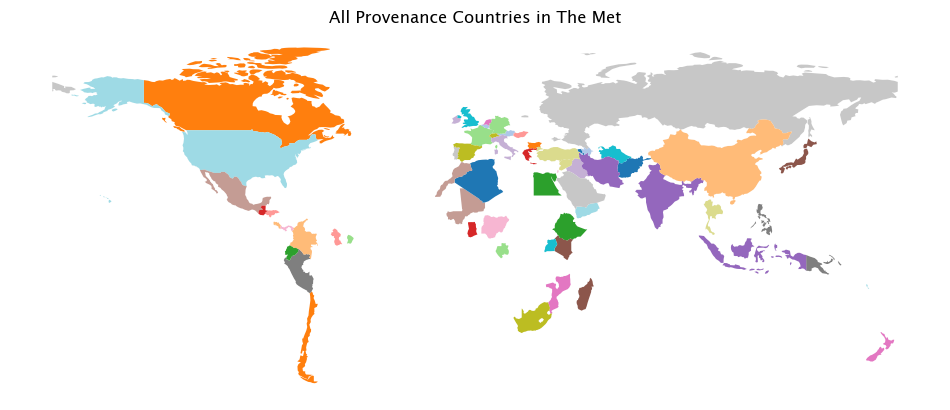

In [25]:
world = gpd.read_file("geopandas/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")  # type: ignore

# Standardize your lookup names to match `world.name`
world['name'] = world['NAME'].str.lower()

# Merge on the country names you successfully geocoded
merged = world.merge(
    geo_df.drop_duplicates('lookup'),
    left_on='name', right_on='lookup', how='inner'
)

ax = merged.plot(
    figsize=(12, 6),
    color='lightgray', edgecolor='white'
)
merged.plot(
    ax=ax, marker='o', column='lookup',
    categorical=True, legend=False,
    markersize=30, cmap='tab20'
)
ax.set_title("All Provenance Countries in The Met")
ax.set_axis_off()


# Create Country Concentration Map

In [26]:
labels_data.head()

attribute_id        attribute_name category sub_category
0             0  country::afghanistan  country  afghanistan
1             1     country::alamania  country     alamania
2             2      country::algeria  country      algeria
3             3       country::arabia  country       arabia
4             4      country::armenia  country      armenia

In [27]:
expanded_rows = []

for _, row in labels_data.iterrows():
    subcat = row['sub_category']
    attr_id = row['attribute_id']  # Include attribute_id for reference

    if subcat in overrides:
        new_val = overrides[subcat]
        if isinstance(new_val, list):
            for val in new_val:
                new_row = row.copy()
                new_row['sub_category'] = val
                expanded_rows.append(new_row)
                print(f"Duplicated row for '{val}' with attribute_id = {attr_id}")
        else:
            new_row = row.copy()
            new_row['sub_category'] = new_val
            expanded_rows.append(new_row)
            print(f"Replaced sub_category with '{new_val}' (attribute_id = {attr_id})")
    else:
        expanded_rows.append(row)

labels_df = pd.DataFrame(expanded_rows)

Replaced sub_category with 'germany' (attribute_id = 1)
Replaced sub_category with 'egypt' (attribute_id = 10)
Replaced sub_category with 'italy' (attribute_id = 12)
Duplicated row for 'colombia' with attribute_id = 16
Duplicated row for 'ecuador' with attribute_id = 16
Duplicated row for 'egypt' with attribute_id = 26
Duplicated row for 'syria' with attribute_id = 26
Replaced sub_category with 'united kingdom' (attribute_id = 27)
Replaced sub_category with 'germany' (attribute_id = 33)
Replaced sub_category with 'netherlands' (attribute_id = 66)
Replaced sub_category with 'france' (attribute_id = 67)
Replaced sub_category with 'afghanistan' (attribute_id = 76)
Replaced sub_category with 'united kingdom' (attribute_id = 84)
Replaced sub_category with 'netherlands' (attribute_id = 87)
Replaced sub_category with 'united states of america' (attribute_id = 96)
Replaced sub_category with 'turkmenistan' (attribute_id = 98)
Replaced sub_category with 'germany' (attribute_id = 353)
Replaced su

In [28]:
print(labels_data.shape)
print(labels_df.shape)

(3474, 4)
(3476, 4)


In [29]:
labels_df.loc[labels_df['attribute_id'] == 26]

attribute_id           attribute_name category sub_category
26            26  country::egypt or syria  country        egypt
26            26  country::egypt or syria  country        syria

In [30]:
attr_counts = pd.read_csv('data/attr_counts.csv')
attr_counts.rename(columns={'Unnamed: 0': 'attribute_id'}, inplace=True)
attr_counts.head()

attribute_id  count
0          3170  21784
1           781  21142
2           782  20672
3           785  20657
4           783  19881

In [31]:
labels_df = labels_df.merge(
    attr_counts[['attribute_id', 'count']],
    on='attribute_id',
    how='left'  # keeps all rows in labels_df
)

labels_df.head()

attribute_id        attribute_name category sub_category  count
0             0  country::afghanistan  country  afghanistan    9.0
1             1     country::alamania  country      germany    3.0
2             2      country::algeria  country      algeria   10.0
3             3       country::arabia  country       arabia    3.0
4             4      country::armenia  country      armenia    3.0

In [32]:
labels_df.loc[labels_df['attribute_id'] == 26]

attribute_id           attribute_name category sub_category  count
27            26  country::egypt or syria  country        egypt  176.0
28            26  country::egypt or syria  country        syria  176.0

In [34]:
# Filter rows where category is 'country'
filtered_df = labels_df[labels_df['category'] == 'country']

# Group by sub_category (country), sum counts, sort by country name
country_counts = (
    filtered_df.groupby('sub_category')['count']
    .sum()
    .sort_index()
    .to_dict()
)

print(country_counts)

{'afghanistan': 50.0, 'algeria': 10.0, 'arabia': 3.0, 'armenia': 3.0, 'austria': 63.0, 'azerbaijan': 5.0, 'belgium': 14.0, 'borneo': 2.0, 'bulgaria': 4.0, 'canada': 47.0, 'chile': 12.0, 'china': 243.0, 'colombia': 203.0, 'costa rica': 129.0, 'costa rica or panama': 23.0, 'czech republic': 33.0, 'democratic republic of the congo': 16.0, 'dominican republic': 34.0, 'ecuador': 104.0, 'egypt': 10936.0, 'egypt and sudan': 10.0, 'egypt or iraq': 9.0, 'ethiopia': 16.0, 'france': 807.0, 'france or germany': 4.0, 'french': 2.0, 'gabon': 4.0, 'germany': 478.0, 'ghana': 22.0, 'greece': 7.0, 'guatemala': 47.0, 'guatemala or mexico': 12.0, 'guyana': 4.0, 'honduras': 3.0, 'hungary': 8.0, 'india': 482.0, 'india or iran': 11.0, 'indonesia': 29.0, 'iran': 3100.0, 'iran (persia)': 2.0, 'iran or central asia': 8.0, 'iran or iraq': 21.0, 'iran or present-day uzbekistan': 4.0, 'iran or turkey': 18.0, 'iraq': 201.0, 'iraq or syria': 14.0, 'ireland': 18.0, 'italy': 255.0, 'japan': 40.0, 'kenya': 2.0, 'korea'

In [43]:
import folium
from folium.plugins import HeatMap

# Merge country_counts into geo_df
geo_df['count'] = geo_df['lookup'].map(country_counts)

# Drop rows with missing lat/lon/count
map_df = geo_df.dropna(subset=['lat', 'lon']).copy()
map_df['count'] = map_df['lookup'].map(country_counts)
map_df = map_df.dropna(subset=['count'])  # Drop rows with no count match

# Build heatmap data
heat_data = [
    [row['lat'], row['lon'], row['count']]
    for _, row in map_df.iterrows()
]

In [44]:
heat_data

[[33.7680065, 66.2385139, 50.0],
 [51.1638175, 10.4478313, 478.0],
 [28.0000272, 2.9999825, 10.0],
 [22.3742506, 49.4770891, 3.0],
 [40.7696272, 44.6736646, 3.0],
 [47.59397, 14.12456, 63.0],
 [40.3936294, 47.7872508, 5.0],
 [50.6402809, 4.6667145, 14.0],
 [1.4297828, 114.7410413, 2.0],
 [42.6073975, 25.4856617, 4.0],
 [26.2540493, 29.2675469, 10936.0],
 [61.0666922, -107.991707, 47.0],
 [42.6384261, 12.674297, 255.0],
 [-31.7613365, -71.3187697, 12.0],
 [35.000074, 104.999927, 243.0],
 [4.099917, -72.9088133, 203.0],
 [4.099917, -72.9088133, 203.0],
 [-1.3397668, -79.3666965, 104.0],
 [10.2735633, -84.0739102, 129.0],
 [49.7439047, 15.3381061, 33.0],
 [-2.9814344, 23.8222636, 16.0],
 [19.0974031, -70.3028026, 34.0],
 [-1.3397668, -79.3666965, 104.0],
 [26.2540493, 29.2675469, 10936.0],
 [31.1987972, 29.9025828, 10.0],
 [26.2540493, 29.2675469, 10936.0],
 [34.8147886, 38.4231781, 451.0],
 [54.7023545, -3.2765753, 563.0],
 [10.2116702, 38.6521203, 16.0],
 [46.603354, 1.8883335, 807.0],


In [45]:
# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

HeatMap(heat_data, radius=15).add_to(m)

# Add a legend using a color scale (via branca)
import branca.colormap as cm

max_count = map_df['count'].max()
min_count = map_df['count'].min()

colormap = cm.LinearColormap(
    colors=['lightblue', 'green', 'yellow', 'red'],
    vmin=min_count,
    vmax=max_count,
    caption='Country Count Intensity'
)

colormap.add_to(m)

# Save or display the map
m.save("country_concentration_map.html")

In [36]:
geo_df.columns

Index(['raw_name', 'lookup', 'lat', 'lon'], dtype='object')

In [46]:
map_df.head()

raw_name       lookup        lat        lon  count
0  afghanistan  afghanistan  33.768006  66.238514   50.0
1     alamania      germany  51.163818  10.447831  478.0
2      algeria      algeria  28.000027   2.999983   10.0
3       arabia       arabia  22.374251  49.477089    3.0
4      armenia      armenia  40.769627  44.673665    3.0

In [47]:
map_df.to_csv('map_data.csv')

# Display Time Period Related Artworks

In [1]:
import pandas as pd
map_df = pd.read_csv('data/map_data.csv')
print(map_df.shape)
map_df.head()

(86, 6)


Unnamed: 0     raw_name       lookup        lat        lon  count
0           0  afghanistan  afghanistan  33.768006  66.238514   50.0
1           1     alamania      germany  51.163818  10.447831  478.0
2           2      algeria      algeria  28.000027   2.999983   10.0
3           3       arabia       arabia  22.374251  49.477089    3.0
4           4      armenia      armenia  40.769627  44.673665    3.0

In [3]:
dataset_path = '/Volumes/KINGSTON/Datasets/imet-2021-fgvc8'
labels_data = pd.read_csv(dataset_path + '/label_map.csv')
train_data = pd.read_csv(dataset_path + '/train-from-kaggle.csv')

In [5]:
labels_data['category'] = labels_data['attribute_name'].str.split('::').str[0]
labels_data['sub_category'] = labels_data['attribute_name'].str.split('::').str[1]

unique_tags_sub_categories = labels_data.loc[
    labels_data['category'] == 'tags', 
    'sub_category'].unique()
print(unique_tags_sub_categories)

['abbeys' 'abraham' 'abstraction' 'acanthus' 'achilles' 'acorns'
 'acrobats' 'actors' 'actresses' 'adam' 'admirals' 'adonis'
 'adoration of the magi' 'adoration of the shepherds' 'ajax'
 'alexander the great' 'allegory' 'altars' 'amazons' 'american civil war'
 'american revolution' 'amphitheatres' 'amulets' 'amun' 'angels' 'anger'
 'animals' 'ankh' 'anklet' 'annunciation' 'aphrodite' 'apocalypse'
 'apollo' 'apostles' 'apples' 'arabic' 'archangel gabriel' 'arches'
 'architects' 'architecture' 'ariadne' 'armor' 'arms' 'army' 'arrowheads'
 'arrows' 'artemis' 'artists' 'assumption of the virgin' 'astronomy'
 'athena' 'athletes' 'autumn' 'avalokiteshvara' 'axes' 'bacchus' 'badges'
 'bagpipes' 'balconies' 'ballet' 'bamboo' 'banners' 'baptism of christ'
 'baptismal fonts' 'barns' 'barrels' 'baseball' 'basins' 'baskets'
 'bathing' 'bathsheba' 'bats' 'battles' 'beaches' 'beads' 'beakers'
 'bearing the cross' 'bears' 'bedrooms' 'beds' 'bees' 'benches'
 'benjamin franklin' 'bes' 'bible' 'bicycles

In [7]:
from transformers import pipeline

# Initialize the NER pipeline with a pre-trained model
# This model is pre-trained to recognize named entities but may not directly identify epochs or time periods.
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", tokenizer="dbmdz/bert-large-cased-finetuned-conll03-english")

# Function to determine if a term is related to a time period/epoch
# This is a simplified version and may require adjustments based on the model's output and specific use case.
def is_time_related(term):
    # Analyze the term with the NER pipeline
    entities = ner_pipeline(term)
    # For demonstration, we'll consider a term time-related if the model identifies any entities within it.
    # This is a simplification and actual implementation might need to consider the entity labels.
    return len(entities) > 0

# Separate time-related terms using the NER pipeline
time_related_terms = [term for term in unique_tags_sub_categories if is_time_related(term)]
non_time_related_terms = [term for term in unique_tags_sub_categories if not is_time_related(term)]

time_related_terms, non_time_related_terms

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


(['abraham',
  'achilles',
  'alexander the great',
  'american civil war',
  'american revolution',
  'apollo',
  'arabic',
  'archangel gabriel',
  'avalokiteshvara',
  'bathsheba',
  'benjamin franklin',
  'chinoiserie',
  'cleopatra',
  'daoism',
  'david',
  'diana',
  'dionysus',
  'eos',
  'flight into egypt',
  'gandhara',
  'gandharan',
  'greek',
  'hieratic',
  'indus valley',
  'iphigenia',
  'isaac',
  'japanese',
  'kashmir',
  'krishna',
  'manjushri',
  'marquis de lafayette',
  'orientalist',
  'persephone',
  'perseus',
  'persian',
  'poseidon',
  'saint catherine',
  'saint francis',
  'saint george',
  'saint jerome',
  'saint john the baptist',
  'saint john the evangelist',
  'saint joseph',
  'saint michael',
  'swat valley',
  'trojan war',
  'vajrapani',
  'vulcan'],
 ['abbeys',
  'abstraction',
  'acanthus',
  'acorns',
  'acrobats',
  'actors',
  'actresses',
  'adam',
  'admirals',
  'adonis',
  'adoration of the magi',
  'adoration of the shepherds',
  'aj

In [12]:
print(f'{time_related_terms}\nlength: {len(time_related_terms)}; Total words: {len(unique_tags_sub_categories)}\n')
print(f'{non_time_related_terms}\nlength: {len(non_time_related_terms)}')


['abraham', 'achilles', 'alexander the great', 'american civil war', 'american revolution', 'apollo', 'arabic', 'archangel gabriel', 'avalokiteshvara', 'bathsheba', 'benjamin franklin', 'chinoiserie', 'cleopatra', 'daoism', 'david', 'diana', 'dionysus', 'eos', 'flight into egypt', 'gandhara', 'gandharan', 'greek', 'hieratic', 'indus valley', 'iphigenia', 'isaac', 'japanese', 'kashmir', 'krishna', 'manjushri', 'marquis de lafayette', 'orientalist', 'persephone', 'perseus', 'persian', 'poseidon', 'saint catherine', 'saint francis', 'saint george', 'saint jerome', 'saint john the baptist', 'saint john the evangelist', 'saint joseph', 'saint michael', 'swat valley', 'trojan war', 'vajrapani', 'vulcan']
length: 48; Total words: 768

['abbeys', 'abstraction', 'acanthus', 'acorns', 'acrobats', 'actors', 'actresses', 'adam', 'admirals', 'adonis', 'adoration of the magi', 'adoration of the shepherds', 'ajax', 'allegory', 'altars', 'amazons', 'amphitheatres', 'amulets', 'amun', 'angels', 'anger'

In [13]:
train_data.head()

id                      attribute_ids
0  000040d66f14ced4cdd18cd95d91800f                       448 2429 782
1  0000ef13e37ef70412166725ec034a8a  2997 3231 2730 3294 3099 2017 784
2  0001eeb4a06e8daa7c6951bcd124c3c7                       2436 1715 23
3  000226398d224de78b191e6db45fd94e                  2997 3433 448 782
4  00029c3b0171158d63b1bbf803a7d750            3465 3322 3170 1553 781

In [20]:
import pandas as pd

# Filter labels_data for 'tags' category and subcategories that are time-related
time_related_labels = labels_data[(labels_data['category'] == 'tags') & 
                                  (labels_data['sub_category'].isin(time_related_terms))]
# print(time_related_labels)

# Extract the attribute_ids for these time-related labels
time_related_attribute_ids = set(time_related_labels['attribute_id'])
# print(time_related_attribute_ids)

# Function to check if any attribute in a row of train_data matches the time-related attribute IDs
def contains_time_related_attribute(attribute_ids_str):
    # Convert the space-separated string of attribute IDs to a set of integers
    try:
        attribute_ids = set(map(int, attribute_ids_str.split()))
        # Check if there's any intersection between the attribute IDs in this row and the time-related ones
        return bool(attribute_ids & time_related_attribute_ids)
    except ValueError:
        # Handle the case where conversion to int fails (e.g., empty string or non-numeric values)
        return False

# Apply the function to filter train_data
filtered_train_data = train_data[train_data['attribute_ids'].apply(contains_time_related_attribute)]


# Extract the image IDs from the filtered data
image_ids = filtered_train_data['id'].tolist()

image_ids

['0066f155580d03bcee8b41c67e8e99c7',
 '0093c3b72777126ba377ca2becfc2c81',
 '00bac891ecaf2d71582fffb7200e8213',
 '00c213288f4958de4f760e6e003db8d5',
 '00cb83a29ed4e6a0c2722511ea3e38e5',
 '00e9e37b09e4dae908bac2493d5507de',
 '00eac598e696616199b10211fe18c22b',
 '00fc6f3e509f27c8cb8b16f7c3648f2e',
 '00fd585b9260952418fd74044d9a90ff',
 '011be688a3351660879c173c67915747',
 '014725ad4125e70185596050cb5829b0',
 '0187b105fef6470ce8422548e76dff6b',
 '01af2bf33b64d04fe433d58e6a421abb',
 '01b2933559693629f3113291157078ce',
 '01c0bd086f398323ce7b58819b4c1fad',
 '01d24ceb9e58fefd439a4ac89c44fb4c',
 '02198686cc5c87338c351cba368b095f',
 '0235f03129be755fedad1e2c32460918',
 '02565067c9895e5ffb8d9163f0b4b96f',
 '025e8da42c82fb25ef427bb4e5281bdc',
 '027127733bcbc020629418341b07aa8c',
 '02847b8aea81717451ffc8019033c704',
 '028aeb6039baac6b7a236377b9b2254b',
 '029e8c0a69d836133f1b38cbfad869e3',
 '02d4e5ca29f5d795cbcf0da89f5adb7c',
 '030f04d87bcd2497c756741493118f51',
 '031aaf87b4e289f4d29cf5724058420b',
 

In [21]:
print(f'Number of time-related images: {len(image_ids)}')

Number of time-related images: 3029


In [22]:
train_imgs_path = "/Volumes/KINGSTON/Datasets/imet-2021-fgvc8/train-1/train-1"

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

In [ ]:
# # First, let's create a mapping from attribute_id to sub_category for time-related terms
# time_related_labels = labels_data[(labels_data['category'] == 'tags') & 
#                                   (labels_data['sub_category'].isin(time_related_terms))]

# # Create a dictionary mapping attribute_id to sub_category
# attribute_to_subcategory = dict(zip(time_related_labels['attribute_id'], time_related_labels['sub_category']))

# # Function to get the subcategory for an image based on its attribute_ids
# def get_image_subcategory(attribute_ids_str):
#     try:
#         attribute_ids = set(map(int, attribute_ids_str.split()))
#         # Find matching time-related subcategories
#         subcategories = [attribute_to_subcategory[attr_id] for attr_id in attribute_ids 
#                         if attr_id in attribute_to_subcategory]
#         # Return the first matching subcategory or 'Unknown' if none found
#         return subcategories[0] if subcategories else 'Unknown'
#     except ValueError:
#         return 'Unknown'

# # Apply the function to get subcategories for filtered data
# filtered_train_data = filtered_train_data.copy()  # Avoid SettingWithCopyWarning
# filtered_train_data['subcategory'] = filtered_train_data['attribute_ids'].apply(get_image_subcategory)

# # Get the first 20 images and their subcategories
# first_20_images = filtered_train_data.head(20)

# # Create a 4x5 grid (4 rows, 5 columns) for displaying images
# fig, axes = plt.subplots(4, 5, figsize=(20, 16))
# fig.suptitle('First 20 Images with Time-Related Subcategories', fontsize=16)

# # Flatten the axes array for easier indexing
# axes = axes.flatten()

# # Display each image
# for idx, (ax, (_, row)) in enumerate(zip(axes, first_20_images.iterrows())):
#     image_id = row['id']
#     subcategory = row['subcategory']
    
#     # Construct the full image path
#     image_path = Path(train_imgs_path) / f"{image_id}.jpg"  # Assuming .jpg extension
    
#     # If .jpg doesn't exist, try .png
#     if not image_path.exists():
#         image_path = Path(train_imgs_path) / f"{image_id}.png"
    
#     # If neither exists, skip this image
#     if not image_path.exists():
#         ax.set_title(f"Image not found\n{subcategory}", fontsize=10)
#         ax.axis('off')
#         continue
    
#     # Load and display the image
#     try:
#         img = mpimg.imread(image_path)
#         ax.imshow(img)
#         ax.set_title(subcategory, fontsize=10, pad=10)
#         ax.axis('off')
#     except Exception as e:
#         ax.set_title(f"Error loading image\n{subcategory}", fontsize=10)
#         ax.axis('off')

# # Hide any unused subplots
# for idx in range(len(first_20_images), len(axes)):
#     axes[idx].axis('off')

# plt.tight_layout()
# plt.show()

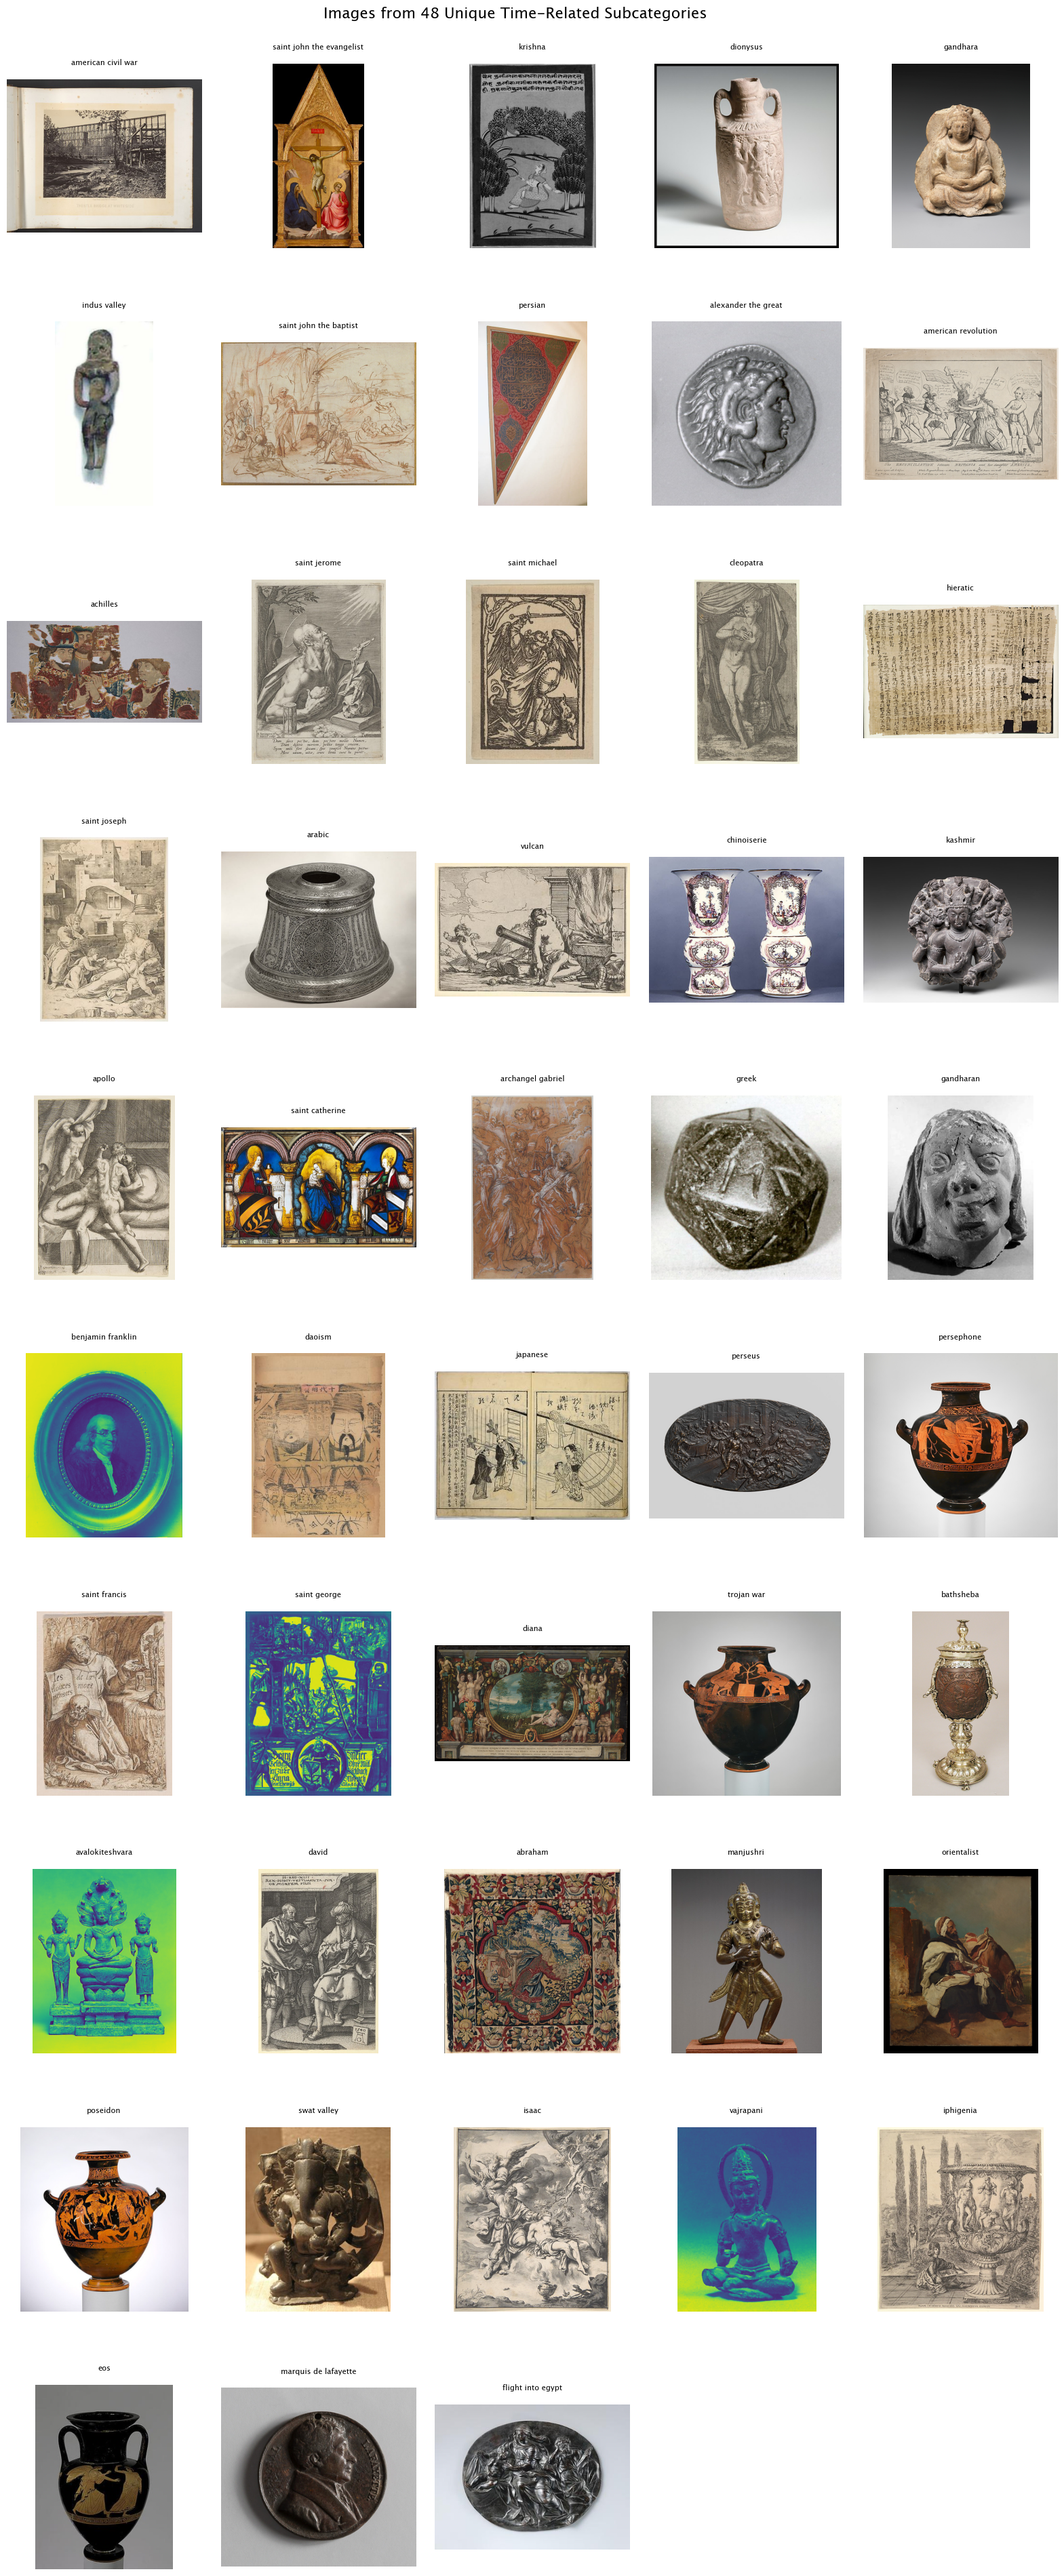

Displayed 48 images from unique subcategories:
  - american civil war: 0066f155580d03bcee8b41c67e8e99c7
  - saint john the evangelist: 0093c3b72777126ba377ca2becfc2c81
  - krishna: 00bac891ecaf2d71582fffb7200e8213
  - dionysus: 00c213288f4958de4f760e6e003db8d5
  - gandhara: 00fc6f3e509f27c8cb8b16f7c3648f2e
  - indus valley: 00fd585b9260952418fd74044d9a90ff
  - saint john the baptist: 011be688a3351660879c173c67915747
  - persian: 0187b105fef6470ce8422548e76dff6b
  - alexander the great: 01b2933559693629f3113291157078ce
  - american revolution: 0235f03129be755fedad1e2c32460918
  - achilles: 02565067c9895e5ffb8d9163f0b4b96f
  - saint jerome: 027127733bcbc020629418341b07aa8c
  - saint michael: 028aeb6039baac6b7a236377b9b2254b
  - cleopatra: 029e8c0a69d836133f1b38cbfad869e3
  - hieratic: 030f04d87bcd2497c756741493118f51
  - saint joseph: 033451367455d846c371364fdbd516bb
  - arabic: 03639633817acfa311e1cbd0a1d1e451
  - vulcan: 036c33243e8d0cbbd91021748654d362
  - chinoiserie: 037f8c972297188

In [ ]:
# Get unique time-related subcategories
time_related_labels = labels_data[(labels_data['category'] == 'tags') & 
                                  (labels_data['sub_category'].isin(time_related_terms))]

unique_subcategories = time_related_labels['sub_category'].unique()

# Create a dictionary mapping attribute_id to sub_category
attribute_to_subcategory = dict(zip(time_related_labels['attribute_id'], time_related_labels['sub_category']))

# Function to get all subcategories for an image based on its attribute_ids
def get_image_subcategories(attribute_ids_str):
    try:
        attribute_ids = set(map(int, attribute_ids_str.split()))
        # Find all matching time-related subcategories
        subcategories = [attribute_to_subcategory[attr_id] for attr_id in attribute_ids 
                        if attr_id in attribute_to_subcategory]
        return subcategories
    except ValueError:
        return []

# Apply the function to get subcategories for all filtered data
filtered_train_data = filtered_train_data.copy()  # Avoid SettingWithCopyWarning
filtered_train_data['subcategories'] = filtered_train_data['attribute_ids'].apply(get_image_subcategories)

# Select one image for each unique subcategory
selected_images = []
selected_subcategories = set()

for _, row in filtered_train_data.iterrows():
    subcategories = row['subcategories']
    # Check if any of the subcategories in this image haven't been selected yet
    for subcategory in subcategories:
        if subcategory not in selected_subcategories:
            selected_images.append((row['id'], subcategory))
            selected_subcategories.add(subcategory)
            break  # Move to the next image once we've found a new subcategory

# Calculate grid dimensions (aiming for ~5 columns)
num_images = len(selected_images)
cols = 5
rows = (num_images + cols - 1) // cols  # Ceiling division

# Create the grid for displaying images with more vertical spacing
fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows + 2))  # Added extra height for title spacing

# Move title to the very top and add padding
fig.suptitle(f'Images from {num_images} Unique Time-Related Subcategories', fontsize=16, y=0.95)

# Adjust subplot spacing to create more padding at the bottom and between rows
plt.subplots_adjust(top=0.93,    # Reduce top margin to give space for title
                    bottom=0.05,  # Increase bottom margin for padding
                    hspace=0.4,   # Increase horizontal spacing between rows
                    wspace=0.1)   # Adjust width spacing between columns

# Flatten the axes array for easier indexing (if there's more than one row)
if rows > 1:
    axes = axes.flatten()
elif num_images > 1:
    axes = axes.reshape(-1)
else:
    axes = [axes]

# Display each image
for idx, (image_id, subcategory) in enumerate(selected_images):
    ax = axes[idx]
    
    # Construct the full image path
    image_path = Path(train_imgs_path) / f"{image_id}.jpg"  # Assuming .jpg extension
    
    # If .jpg doesn't exist, try .png
    if not image_path.exists():
        image_path = Path(train_imgs_path) / f"{image_id}.png"
    
    # If neither exists, show a placeholder
    if not image_path.exists():
        ax.set_title(f"Image not found\n{subcategory}", fontsize=8, pad=15)  # Increased pad value
        ax.axis('off')
        continue
    
    # Load and display the image
    try:
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.set_title(subcategory, fontsize=8, pad=15)  # Increased pad value for spacing
        ax.axis('off')
    except Exception as e:
        ax.set_title(f"Error loading image\n{subcategory}", fontsize=8, pad=15)  # Increased pad value
        ax.axis('off')

# Hide any unused subplots
for idx in range(len(selected_images), len(axes)):
    axes[idx].axis('off')

plt.show()

# Print summary
print(f"Displayed {len(selected_images)} images from unique subcategories:")
for image_id, subcategory in selected_images:
    print(f"  - {subcategory}: {image_id}")

In [36]:
# Get unique time-related subcategories
time_related_labels = labels_data[(labels_data['category'] == 'tags') & 
                                  (labels_data['sub_category'].isin(time_related_terms))]

# Create a dictionary mapping attribute_id to sub_category
attribute_to_subcategory = dict(zip(time_related_labels['attribute_id'], time_related_labels['sub_category']))

# Function to get all subcategories for an image based on its attribute_ids
def get_image_subcategories(attribute_ids_str):
    try:
        attribute_ids = set(map(int, attribute_ids_str.split()))
        # Find all matching time-related subcategories
        subcategories = [attribute_to_subcategory[attr_id] for attr_id in attribute_ids 
                        if attr_id in attribute_to_subcategory]
        return subcategories
    except ValueError:
        return []

# Apply the function to get subcategories for all filtered data
filtered_train_data = filtered_train_data.copy()  # Avoid SettingWithCopyWarning
filtered_train_data['subcategories'] = filtered_train_data['attribute_ids'].apply(get_image_subcategories)

# Count artworks for each time-related subcategory
artwork_counts = {}

# Initialize counts for all time-related subcategories
for subcategory in time_related_labels['sub_category'].unique():
    artwork_counts[subcategory] = 0

# Count artworks for each subcategory
for _, row in filtered_train_data.iterrows():
    subcategories = row['subcategories']
    for subcategory in subcategories:
        if subcategory in artwork_counts:
            artwork_counts[subcategory] += 1

# Sort the dictionary by count in descending order
artwork_counts = dict(sorted(artwork_counts.items(), key=lambda item: item[1], reverse=True))

# Display the results
print("Artwork counts for each time-related label:")
for subcategory, count in artwork_counts.items():
    print(f"  - {subcategory}: {count}")

print(f"\nTotal unique time-related labels: {len(artwork_counts)}")
print(f"Total artworks with time-related labels: {sum(artwork_counts.values())}")

Artwork counts for each time-related label:
  - american civil war: 469
  - saint john the baptist: 323
  - arabic: 266
  - gandhara: 157
  - apollo: 144
  - chinoiserie: 144
  - saint jerome: 99
  - saint john the evangelist: 97
  - diana: 95
  - saint catherine: 84
  - saint joseph: 83
  - daoism: 74
  - dionysus: 70
  - benjamin franklin: 65
  - david: 62
  - krishna: 62
  - avalokiteshvara: 58
  - alexander the great: 56
  - saint francis: 55
  - abraham: 51
  - kashmir: 51
  - american revolution: 48
  - saint george: 46
  - saint michael: 39
  - archangel gabriel: 36
  - vulcan: 35
  - greek: 32
  - perseus: 32
  - hieratic: 27
  - indus valley: 26
  - manjushri: 25
  - marquis de lafayette: 24
  - cleopatra: 23
  - achilles: 17
  - orientalist: 16
  - gandharan: 15
  - trojan war: 15
  - swat valley: 14
  - poseidon: 12
  - persian: 11
  - japanese: 9
  - bathsheba: 8
  - flight into egypt: 7
  - iphigenia: 6
  - isaac: 6
  - vajrapani: 6
  - persephone: 4
  - eos: 2

Total uniq

In [39]:
import json

In [41]:
with open('time_artworks_count.json', 'w') as f:
    json.dump(artwork_counts, f, indent=4)

In [43]:
# Save time_related_terms, non_time_related_terms, image_ids
# Save all lists to a single JSON file
data_to_save = {
    'time_related_terms': time_related_terms,
    'non_time_related_terms': non_time_related_terms,
    'image_ids': image_ids
}

with open('time_classification_results.json', 'w') as f:
    json.dump(data_to_save, f, indent=4)

print("Lists saved to 'time_classification_results.json'")

Lists saved to 'time_classification_results.json'


# Display Timeline Distribution

In [ ]:
import json
import pandas as pd

with open("data/time_artworks_count.json") as f:
    time_artworks_count = json.load(f)

time_artworks_count

{'american civil war': 469,
 'saint john the baptist': 323,
 'arabic': 266,
 'gandhara': 157,
 'apollo': 144,
 'chinoiserie': 144,
 'saint jerome': 99,
 'saint john the evangelist': 97,
 'diana': 95,
 'saint catherine': 84,
 'saint joseph': 83,
 'daoism': 74,
 'dionysus': 70,
 'benjamin franklin': 65,
 'david': 62,
 'krishna': 62,
 'avalokiteshvara': 58,
 'alexander the great': 56,
 'saint francis': 55,
 'abraham': 51,
 'kashmir': 51,
 'american revolution': 48,
 'saint george': 46,
 'saint michael': 39,
 'archangel gabriel': 36,
 'vulcan': 35,
 'greek': 32,
 'perseus': 32,
 'hieratic': 27,
 'indus valley': 26,
 'manjushri': 25,
 'marquis de lafayette': 24,
 'cleopatra': 23,
 'achilles': 17,
 'orientalist': 16,
 'gandharan': 15,
 'trojan war': 15,
 'swat valley': 14,
 'poseidon': 12,
 'persian': 11,
 'japanese': 9,
 'bathsheba': 8,
 'flight into egypt': 7,
 'iphigenia': 6,
 'isaac': 6,
 'vajrapani': 6,
 'persephone': 4,
 'eos': 2}

In [44]:
with open("data/time_classification_results.json") as f:
    time_classification_results = json.load(f)

time_classification_results

{'time_related_terms': ['abraham',
  'achilles',
  'alexander the great',
  'american civil war',
  'american revolution',
  'apollo',
  'arabic',
  'archangel gabriel',
  'avalokiteshvara',
  'bathsheba',
  'benjamin franklin',
  'chinoiserie',
  'cleopatra',
  'daoism',
  'david',
  'diana',
  'dionysus',
  'eos',
  'flight into egypt',
  'gandhara',
  'gandharan',
  'greek',
  'hieratic',
  'indus valley',
  'iphigenia',
  'isaac',
  'japanese',
  'kashmir',
  'krishna',
  'manjushri',
  'marquis de lafayette',
  'orientalist',
  'persephone',
  'perseus',
  'persian',
  'poseidon',
  'saint catherine',
  'saint francis',
  'saint george',
  'saint jerome',
  'saint john the baptist',
  'saint john the evangelist',
  'saint joseph',
  'saint michael',
  'swat valley',
  'trojan war',
  'vajrapani',
  'vulcan'],
 'non_time_related_terms': ['abbeys',
  'abstraction',
  'acanthus',
  'acorns',
  'acrobats',
  'actors',
  'actresses',
  'adam',
  'admirals',
  'adonis',
  'adoration of 

In [18]:
import plotly.graph_objects as go

# Define the time periods and their corresponding artwork counts
time_periods = [
    ('Paleolithic', -300000, -6000),
    ('Neolithic', -6000, -500),
    ('Ancient', -500, 500),
    ('Medieval', 500, 1400),
    ('Renaissance', 1400, 1600),
    ('Early Modern', 1600, 1800),
    ('Modern', 1800, 1900),
    ('Contemporary', 1900, 2025)
]

artwork_counts = {
    'Paleolithic': 50,
    'Neolithic': 75,
    'Ancient': 120,
    'Medieval': 150,
    'Renaissance': 200,
    'Early Modern': 250,
    'Modern': 300,
    'Contemporary': 350
}

# Normalize the time ranges to occupy 4 units each
normalized_time_ranges = []
for i, (start, end) in zip(time_periods):
    normalized_start = max(-300000, min(start, end))
    normalized_end = max(-300000, min(start + 4, end + 4))
    normalized_time_ranges.append((normalized_start, normalized_end))

# Create the figure
fig = go.Figure()

# Add the bars
for i, (name, start_date, end_date) in enumerate(normalized_time_ranges):
    fig.add_trace(go.Bar(
        x=[start_date, end_date],
        y=[name, name],
        orientation='h',
        width=1,
        marker=dict(color=f"rgb(255,{int((end_date-start_date)/100*255)},0)", line_color="white"),
        text=name,
        textposition="outside",
        hovertext=f"{name}: {artwork_counts[name]} artworks"
    ))

# Update layout
fig.update_layout(
    title_text="The Metropolitan Museum of Art Collection Timeline",
    xaxis_title="Years",
    yaxis_title="Periods",
    yaxis_tickformat="",
    xaxis_range=[-300000, 2025],
    height=600,
    width=1200,
    bargap=0.1,
    showlegend=False
)

# Show the plot
fig.show()

ValueError: not enough values to unpack (expected 2, got 1)